In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 성일정보고등학교 학생 데이터
# 변수명 => SHD

In [2]:
SHD = pd.read_csv('1급-기밀파일(연봉 수정 버전).csv', encoding='cp949')
SHD.head(1)

,타임스탬프,학년,성별,학과,취미,개인공부시간,공부 시간대,기대연봉(단위:만원),학과 만족여부,전공 선호도,소셜미디어 사용시간,등교시간,하교시간,하교후 가는 곳,학업 스트레스,친구관계,알바,방과후 여부
0,2023. 10. 12 오후 12:21:46,2학년,남자,창업마케팅과,운동,1시간-2시간,방과후(저녁),3000,O,5,1시간-2시간,10-30분,18시 이후!,학원 또는 방과후,좋음,나쁨,X,O


# 1,2,3학년 별 설문 참여도 (1학년 최고)

In [3]:
SHD['학년'].value_counts()
# 학년별 설문조사 참여 수

1학년    129
2학년    107
3학년     29
Name: 학년, dtype: int64

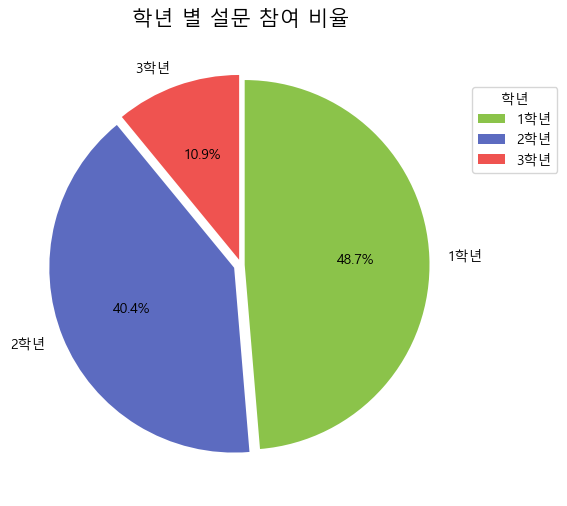

In [4]:
plt.rc('font',family='Malgun Gothic')

plt.figure(figsize=(10,6))
explode=[0.02,0.04,0.03]
colors = ['#8BC34A','#5C6BC0','#EF5350']
labels=['1학년','2학년','3학년']
plt.pie(SHD['학년'].value_counts(),
        labels=labels,
        autopct='%.1f%%',
        counterclock=False,
        startangle=90,
        explode=explode,
        colors=colors,
       )
plt.title('학년 별 설문 참여 비율', fontsize=15)
plt.legend(loc=(1, 0.7),title = '학년')
plt.show()

# 7개 학과 별 설문 참여도 (전산계열이 압도적)

In [5]:
SHD['학과'].value_counts()
# 학과별 설문조사 참여 수

소프트웨어개발과    97
스마트웹콘텐츠과    55
창업마케팅과      42
부사관과        34
금융경영과       28
뷰티디자인과       5
회계정보과        4
Name: 학과, dtype: int64

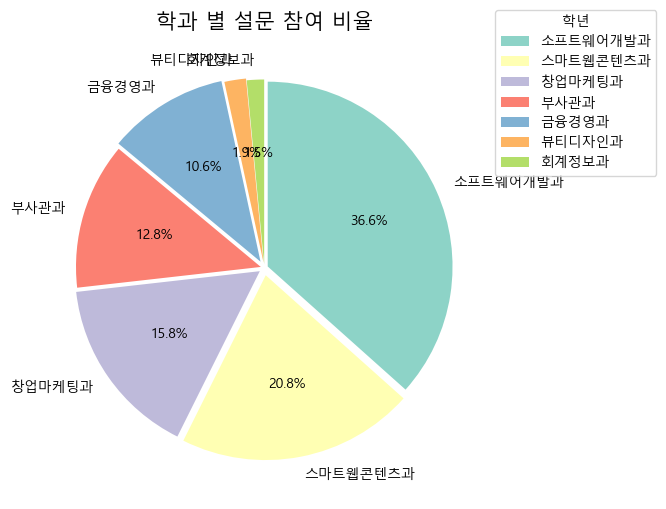

In [6]:
plt.rc('font',family='Malgun Gothic')
sns.set_palette("Set3")

plt.figure(figsize=(10,6))
explode=[0.02,0.04,0.03,0.02,0.04,0.03,0.02]
labels=['소프트웨어개발과','스마트웹콘텐츠과','창업마케팅과',
        '부사관과','금융경영과','뷰티디자인과','회계정보과']
plt.pie(SHD['학과'].value_counts(),
        labels=labels,
        autopct='%.1f%%',
        counterclock=False,
        startangle=90,
        explode=explode,
       )
plt.title('학과 별 설문 참여 비율', fontsize=15)
plt.legend(loc=(1, 0.7),title = '학년')
plt.show()

# 학과별에 따른 학년별 설문 참여도

In [7]:
SHD.groupby(['학년','학과'])[['학년']].count()

학년
학년  학과          
1학년 금융경영과     14
    부사관과      23
    소프트웨어개발과  44
    스마트웹콘텐츠과  25
    창업마케팅과    20
    회계정보과      3
2학년 금융경영과     11
    부사관과      11
    소프트웨어개발과  40
    스마트웹콘텐츠과  23
    창업마케팅과    22
3학년 금융경영과      3
    뷰티디자인과     5
    소프트웨어개발과  13
    스마트웹콘텐츠과   7
    회계정보과      1

# 학년별로 추출해 SHD_0 형식으로 변수 저장

In [8]:
SHD_1 = SHD[SHD['학년']=='1학년'] # 1학년 데이터만 추출(변수 저장)
SHD_2 = SHD[SHD['학년']=='2학년'] # 2학년 데이터만 추출(변수 저장)
SHD_3 = SHD[SHD['학년']=='3학년'] # 3학년 데이터만 추출(변수 저장)

# 7개 학과에 따른 남여 비율 그래프

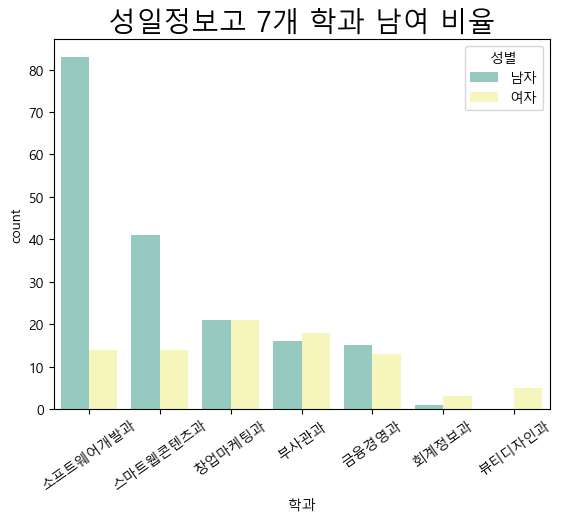

In [9]:
sns.set_palette("Set3")
sns.countplot(data=SHD, x='학과', hue='성별',
              order=['소프트웨어개발과','스마트웹콘텐츠과','창업마케팅과','부사관과','금융경영과','회계정보과','뷰티디자인과'])
plt.title('성일정보고 7개 학과 남여 비율', fontsize=20)
plt.xticks(rotation=35)
plt.show()

# 알바 여부 비율이 가장 높은 학년은?

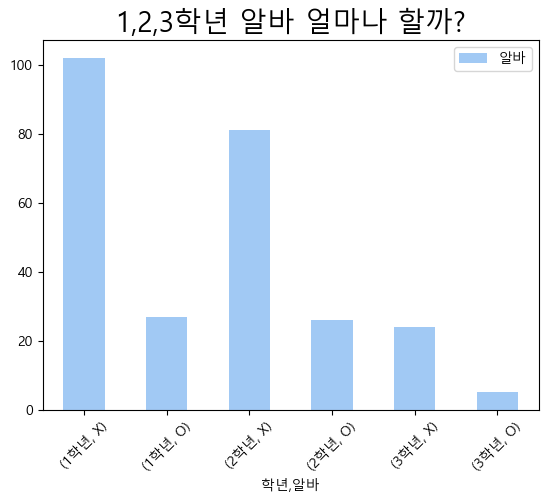

In [10]:
sns.set_palette("pastel")
SHD.groupby(['학년'])['알바'].value_counts().plot(kind='bar') #학년 그룹 알바 컬럼 나열
plt.rc('font',family='Malgun Gothic') # 텍스트 한글 패치
plt.title('1,2,3학년 알바 얼마나 할까?', fontsize=20) # 제목 텍스트 크기
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 성일정보고 학생 소셜미디어 사용시간

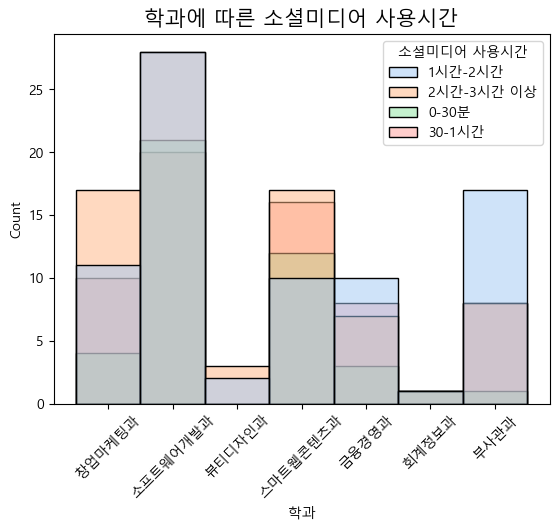

In [11]:
sns.set_palette("pastel")
sns.histplot(data=SHD, x='학과' , hue='소셜미디어 사용시간')
plt.title('학과에 따른 소셜미디어 사용시간', fontsize=15)
plt.xticks(rotation=45)
plt.show()

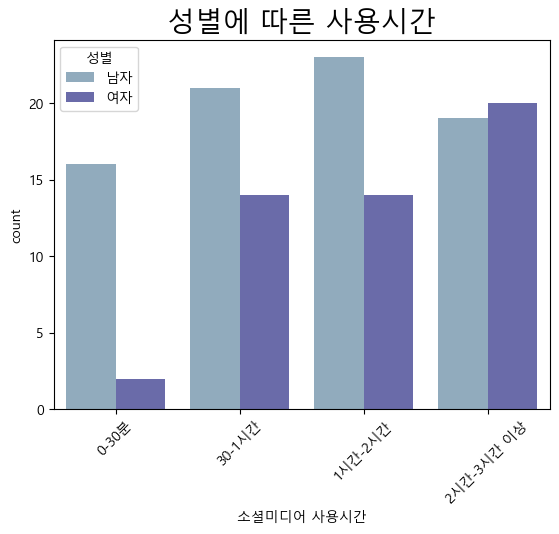

In [12]:
sns.set_palette('twilight')
sns.countplot(data=SHD_1, x='소셜미디어 사용시간', hue='성별', order=['0-30분','30-1시간','1시간-2시간','2시간-3시간 이상'])
plt.title('성별에 따른 사용시간', fontsize=20)
plt.xticks(rotation=45)
plt.show()

# SHD_1 데이터

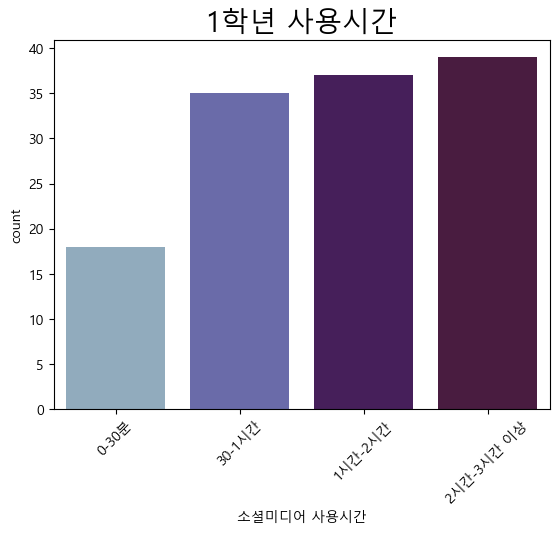

In [13]:
sns.set_palette('twilight')
sns.countplot(data=SHD_1, x='소셜미디어 사용시간', order=['0-30분','30-1시간','1시간-2시간','2시간-3시간 이상'])
plt.title('1학년 사용시간', fontsize=20)
plt.xticks(rotation=45)
plt.show()

# SHD_2 데이터

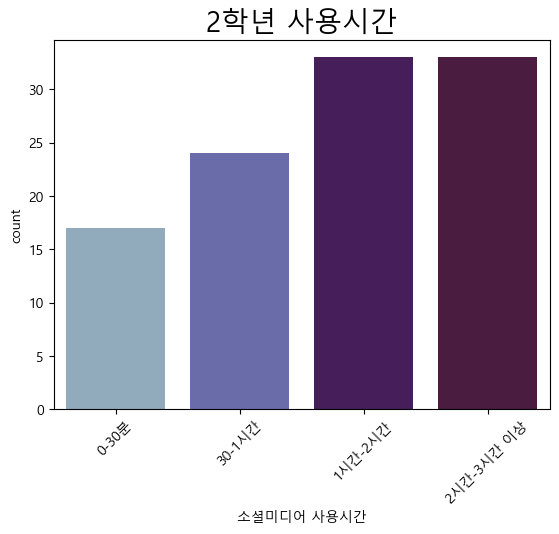

In [14]:
sns.set_palette('twilight')
sns.countplot(data=SHD_2, x='소셜미디어 사용시간', order=['0-30분','30-1시간','1시간-2시간','2시간-3시간 이상'])
plt.title('2학년 사용시간', fontsize=20)
plt.xticks(rotation=45)
plt.show()

# SHD_3 데이터

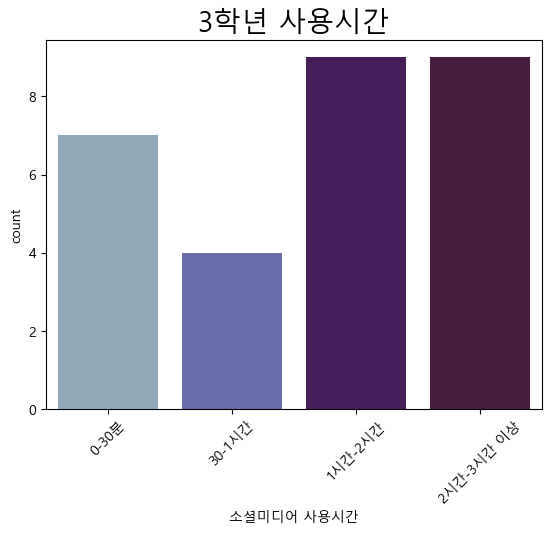

In [15]:
sns.set_palette('twilight')
sns.countplot(data=SHD_3, x='소셜미디어 사용시간', order=['0-30분','30-1시간','1시간-2시간','2시간-3시간 이상'])
plt.title('3학년 사용시간', fontsize=20)
plt.xticks(rotation=45)
plt.show()

# 성일정보고 학생들의 취미 1위는 게임

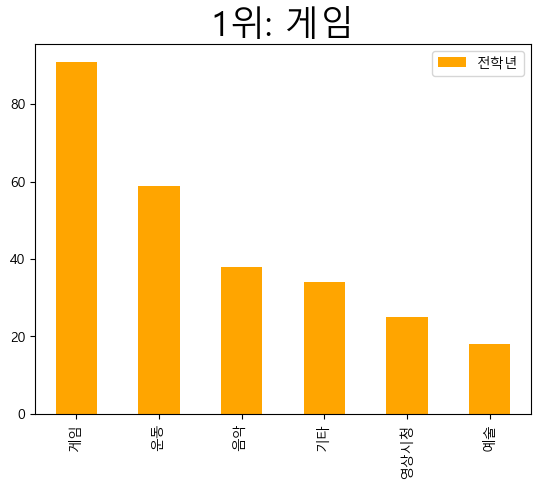

In [16]:
SHD['취미'].value_counts().plot(kind='bar',color='orange', label='전학년')
plt.title('1위: 게임',fontsize=25)
plt.legend()
plt.show()

# male 변수로 => 남자 랜덤 88명을 뽑았다.

In [17]:
male = SHD[SHD['성별']=='남자'].sample(n = 88)
female = SHD[SHD['성별']=='여자']

# 전

In [18]:
SHD['성별'].value_counts()

남자    177
여자     88
Name: 성별, dtype: int64

# 후

In [19]:
new_SHD = pd.concat([male,female])
new_SHD['성별'].value_counts()

남자    88
여자    88
Name: 성별, dtype: int64

# new_SHD 변수에 데이터를 넣어 성별을 동등하게 정렬했다.

In [20]:
new_SHD.head(1)

,타임스탬프,학년,성별,학과,취미,개인공부시간,공부 시간대,기대연봉(단위:만원),학과 만족여부,전공 선호도,소셜미디어 사용시간,등교시간,하교시간,하교후 가는 곳,학업 스트레스,친구관계,알바,방과후 여부
199,2023. 10. 12 오후 6:14:08,2학년,남자,소프트웨어개발과,게임,1시간-2시간,방과후(저녁),4000,O,5,1시간-2시간,10-30분,바로 집에 가요!,학원 또는 방과후,나쁨,나쁨,X,O


# 정보고 학생들이 가장 많이 갖고 있는  취미는?

- ## 남학생 : 게임, 운동
- ## 여학생 : 음악, 영상시청

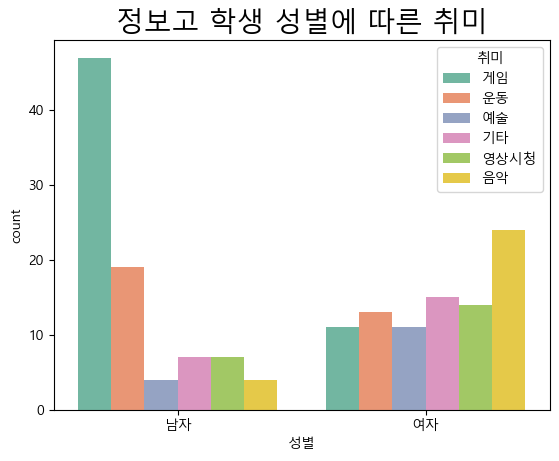

In [21]:
sns.set_palette('Set2')
sns.countplot(data=new_SHD, x='성별', hue='취미')
plt.title('정보고 학생 성별에 따른 취미', fontsize=20)
plt.show()

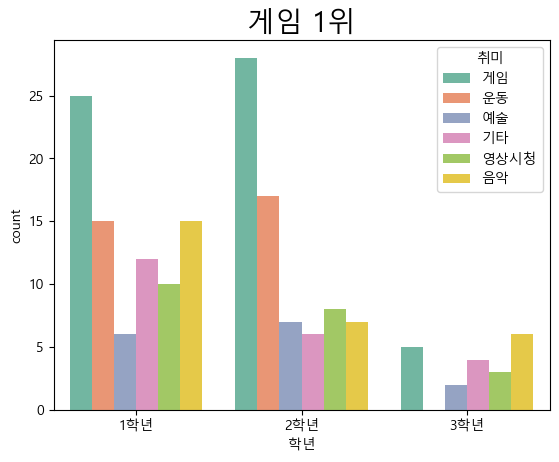

In [22]:
sns.set_palette("Set2")
sns.countplot(data=new_SHD, x='학년', hue='취미', order=['1학년','2학년','3학년'])
plt.title('게임 1위', fontsize=20)
plt.show()

# 3학년은 방과후를 안 하기 때문에
# SHD_12 라는 변수에 위에 만든 1,2학년을 넣어준다.

In [23]:
SHD_12 = pd.concat([SHD_1,SHD_2])

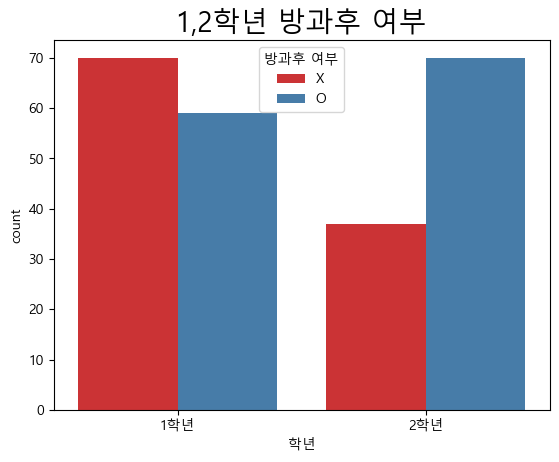

In [24]:
sns.set_palette("Set1")
sns.countplot(data=SHD_12, x='학년', hue='방과후 여부')
plt.title('1,2학년 방과후 여부', fontsize=20)
plt.show()

In [25]:
SHD['학년'].value_counts()

1학년    129
2학년    107
3학년     29
Name: 학년, dtype: int64

# 성일정보고등학교 전공 선호도는
- 1학년은 평균 6점
- 2학년은 평균 7점
- 3학년은 평균 5점

# 평균적으로 10점 만점 중 6점이다.

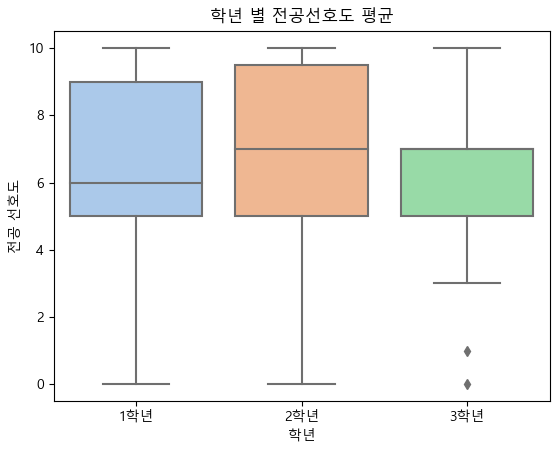

In [26]:
sns.set_palette("pastel")
sns.boxplot(data=SHD, x='학년', y='전공 선호도', order=['1학년','2학년','3학년'])
plt.title('학년 별 전공선호도 평균')
# 박스 안에 있는 선은 평균을 나타냅니다.
plt.show()

# 1학년 전공 선호도

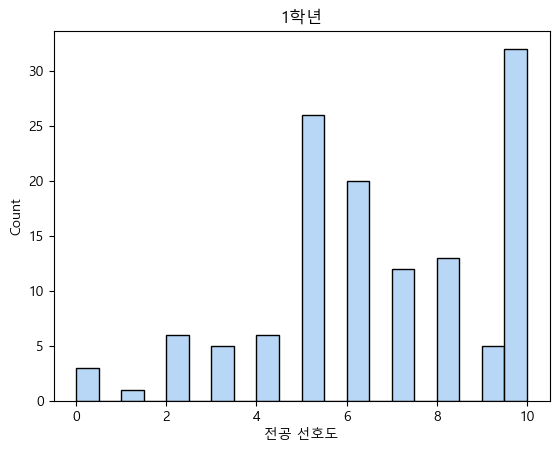

In [27]:
sns.set_palette("pastel")
sns.histplot(data=SHD_1, x='전공 선호도', bins=20)
plt.title('1학년')
plt.show()

# 2학년 전공 선호도

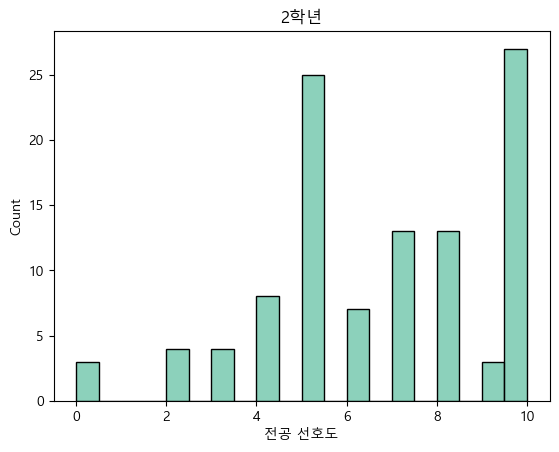

In [28]:
sns.set_palette("Set2")
sns.histplot(data=SHD_2, x='전공 선호도', bins=20)
plt.title('2학년')
plt.show()

# 3학년 전공 선호도

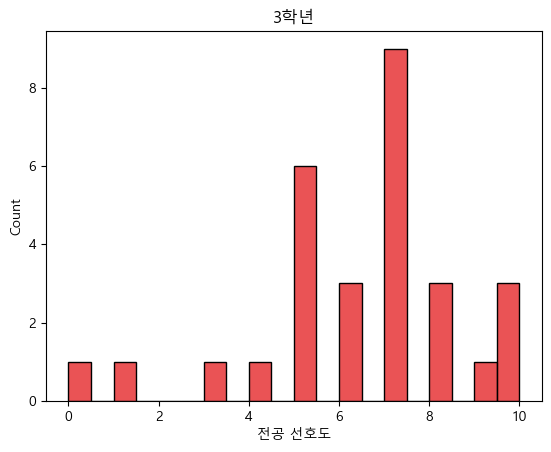

In [29]:
sns.set_palette("Set1")
sns.histplot(data=SHD_3, x='전공 선호도', bins=20)
plt.title('3학년')
plt.show()

# 자신 학과 전공에 대해 어는 정도 선호하는지

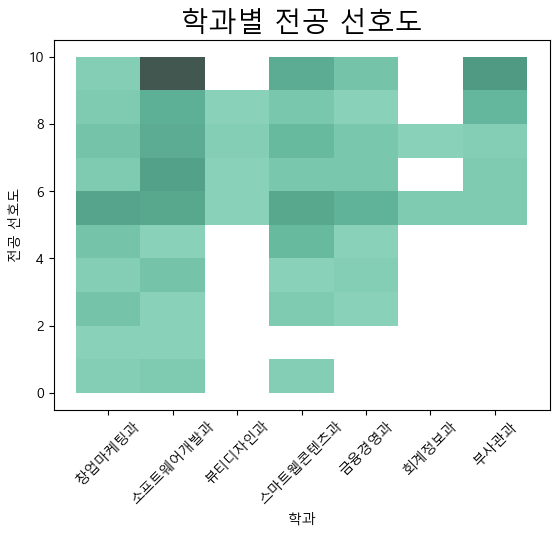

In [30]:
sns.set_palette("Set2")
sns.histplot(data=SHD, x='학과', y='전공 선호도')
plt.title('학과별 전공 선호도', fontsize=20)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, '학과 전공 선호도')

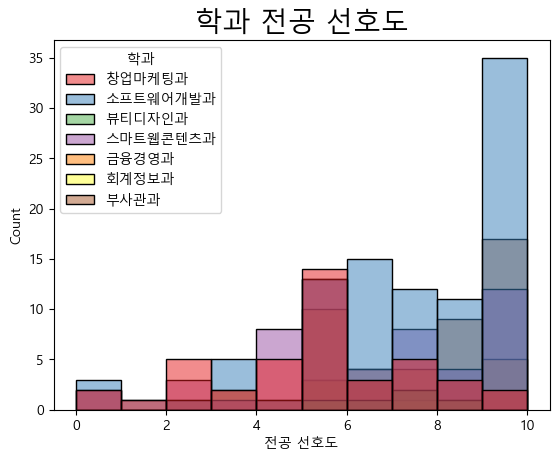

In [31]:
sns.set_palette('Set1')
sns.histplot(data=SHD, x='전공 선호도', hue='학과')
plt.title('학과 전공 선호도', fontsize=20)

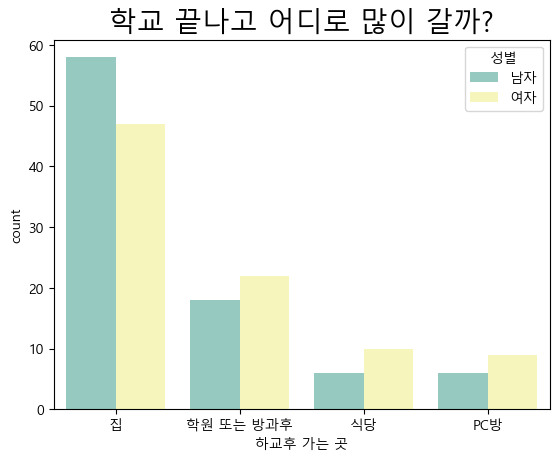

In [32]:
sns.set_palette("Set3")
sns.countplot(data=new_SHD, x='하교후 가는 곳', hue='성별', order=['집','학원 또는 방과후','식당','PC방'])
plt.title('학교 끝나고 어디로 많이 갈까?', fontsize=20)
plt.show()

# 특성화고인 정보고를 다니면서 개인별 기대연봉을 알아보았습니다.

In [33]:
SHD[['기대연봉(단위:만원)']].head()

,기대연봉(단위:만원)
0,3000
1,2500
2,3000
3,3200
4,2300


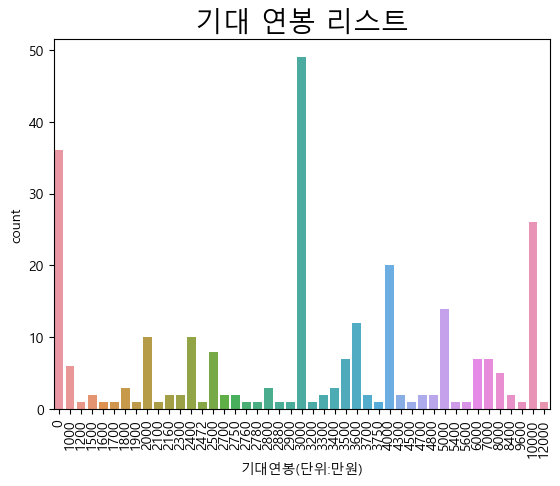

In [34]:
sns.countplot(data=SHD, x='기대연봉(단위:만원)')
plt.title('기대 연봉 리스트', fontsize=20)
plt.xticks(rotation=90)
plt.show()

# 학교에서 받는 스트레스는 어떨까?

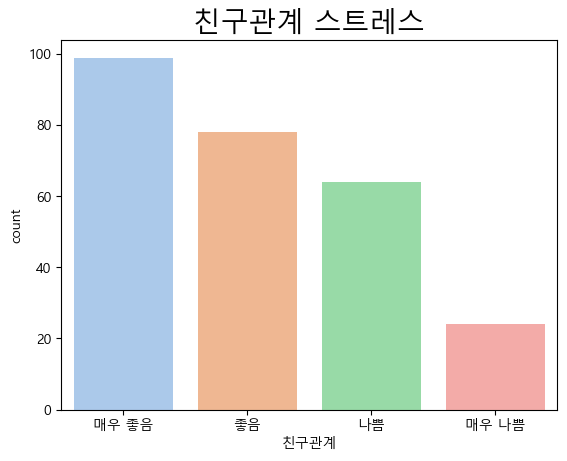

In [35]:
sns.set_palette("pastel")
sns.countplot(data=SHD, x='친구관계', order=['매우 좋음','좋음','나쁨','매우 나쁨'])
plt.title('친구관계 스트레스', fontsize=20)
plt.show()

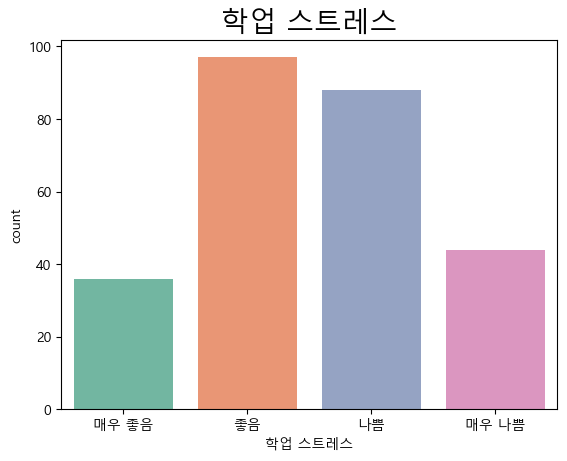

In [36]:
sns.set_palette("Set2")
sns.countplot(data=SHD, x='학업 스트레스', order=['매우 좋음','좋음','나쁨','매우 나쁨'])
plt.title('학업 스트레스', fontsize=20)
plt.show()

In [37]:
from scipy.stats import norm

In [38]:
male = SHD[SHD['성별']=='남자']
female = SHD[SHD['성별']=='여자']

In [39]:
male['학과'].value_counts()

소프트웨어개발과    83
스마트웹콘텐츠과    41
창업마케팅과      21
부사관과        16
금융경영과       15
회계정보과        1
Name: 학과, dtype: int64

In [40]:
female['학과'].value_counts()

창업마케팅과      21
부사관과        18
소프트웨어개발과    14
스마트웹콘텐츠과    14
금융경영과       13
뷰티디자인과       5
회계정보과        3
Name: 학과, dtype: int64

# 걱정마 잘 하고 있으니까